In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [6]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'depthwise15_106words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [7]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [8]:
X = X.astype('float32')
X /= 255


In [9]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [10]:
del X,Y

In [11]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [12]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # First layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fifth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Sixth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Seventh layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Eighth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Nineth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 10th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 11th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 12th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
   
    # Flatten the output from convolutional layers
    tf.keras.layers.Flatten(),
    
    # Add a dense layer to learn the final classification
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with softmax activation function for multi-class classification
    tf.keras.layers.Dense(106, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d (Depthwise  (None, 128, 128, 3)      30        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 3)      1

In [13]:
print('Training model 1')
opt = Adam(learning_rate=0.00001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 5, restore_best_weights = True)
# Compile the model with categorical crossentropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model1.summary()

history_const = model.fit(X_train, y_train,batch_size=100, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
244/244 [==============================] - 46s 178ms/step - loss: 4.6449 - accuracy: 0.0158 - val_loss: 4.6619 - val_accuracy: 0.0165
Epoch 2/1000
244/244 [==============================] - 42s 174ms/step - loss: 4.5412 - accuracy: 0.0359 - val_loss: 4.6225 - val_accuracy: 0.0793
Epoch 3/1000
244/244 [==============================] - 42s 174ms/step - loss: 4.4151 - accuracy: 0.0611 - val_loss: 4.3566 - val_accuracy: 0.1100
Epoch 4/1000
244/244 [==============================] - 43s 177ms/step - loss: 4.2470 - accuracy: 0.0834 - val_loss: 4.0669 - val_accuracy: 0.1254
Epoch 5/1000
244/244 [==============================] - 47s 194ms/step - loss: 4.0576 - accuracy: 0.0980 - val_loss: 3.8210 - val_accuracy: 0.1538
Epoch 6/1000
244/244 [==============================] - 195s 801ms/step - loss: 3.8674 - accuracy: 0.1170 - val_loss: 3.6038 - val_accuracy: 0.1965
Epoch 7/1000
244/244 [==============================] - 45s 186ms/step - loss: 3.7016 - accuracy: 0.

244/244 [==============================] - 44s 181ms/step - loss: 0.7816 - accuracy: 0.7612 - val_loss: 0.5725 - val_accuracy: 0.8396
Epoch 112/1000
244/244 [==============================] - 44s 181ms/step - loss: 0.7667 - accuracy: 0.7642 - val_loss: 0.5678 - val_accuracy: 0.8405
Epoch 113/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.7593 - accuracy: 0.7654 - val_loss: 0.5588 - val_accuracy: 0.8434
Epoch 114/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.7493 - accuracy: 0.7709 - val_loss: 0.5559 - val_accuracy: 0.8432
Epoch 115/1000
244/244 [==============================] - 45s 186ms/step - loss: 0.7385 - accuracy: 0.7706 - val_loss: 0.5397 - val_accuracy: 0.8473
Epoch 116/1000
244/244 [==============================] - 44s 180ms/step - loss: 0.7436 - accuracy: 0.7688 - val_loss: 0.5347 - val_accuracy: 0.8496
Epoch 117/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.7193 - accuracy: 0.7783 - val_loss: 0.

244/244 [==============================] - 44s 181ms/step - loss: 0.4195 - accuracy: 0.8653 - val_loss: 0.2808 - val_accuracy: 0.9189
Epoch 167/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.4169 - accuracy: 0.8666 - val_loss: 0.2757 - val_accuracy: 0.9211
Epoch 168/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.4093 - accuracy: 0.8692 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 169/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.4008 - accuracy: 0.8721 - val_loss: 0.2706 - val_accuracy: 0.9232
Epoch 170/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.3970 - accuracy: 0.8766 - val_loss: 0.2678 - val_accuracy: 0.9227
Epoch 171/1000
244/244 [==============================] - 44s 182ms/step - loss: 0.3886 - accuracy: 0.8772 - val_loss: 0.2639 - val_accuracy: 0.9237
Epoch 172/1000
244/244 [==============================] - 45s 183ms/step - loss: 0.3928 - accuracy: 0.8748 - val_loss: 0.

244/244 [==============================] - 43s 175ms/step - loss: 0.2484 - accuracy: 0.9199 - val_loss: 0.1592 - val_accuracy: 0.9515
Epoch 222/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2427 - accuracy: 0.9224 - val_loss: 0.1590 - val_accuracy: 0.9527
Epoch 223/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2380 - accuracy: 0.9233 - val_loss: 0.1562 - val_accuracy: 0.9523
Epoch 224/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2356 - accuracy: 0.9223 - val_loss: 0.1541 - val_accuracy: 0.9535
Epoch 225/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2373 - accuracy: 0.9227 - val_loss: 0.1542 - val_accuracy: 0.9536
Epoch 226/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2367 - accuracy: 0.9229 - val_loss: 0.1522 - val_accuracy: 0.9545
Epoch 227/1000
244/244 [==============================] - 43s 175ms/step - loss: 0.2315 - accuracy: 0.9256 - val_loss: 0.

244/244 [==============================] - 44s 180ms/step - loss: 0.1591 - accuracy: 0.9473 - val_loss: 0.1057 - val_accuracy: 0.9671
Epoch 277/1000
244/244 [==============================] - 51s 209ms/step - loss: 0.1584 - accuracy: 0.9486 - val_loss: 0.1051 - val_accuracy: 0.9682
Epoch 278/1000
244/244 [==============================] - 45s 184ms/step - loss: 0.1519 - accuracy: 0.9503 - val_loss: 0.1048 - val_accuracy: 0.9680
Epoch 279/1000
244/244 [==============================] - 46s 190ms/step - loss: 0.1512 - accuracy: 0.9511 - val_loss: 0.1047 - val_accuracy: 0.9676
Epoch 280/1000
244/244 [==============================] - 46s 189ms/step - loss: 0.1525 - accuracy: 0.9484 - val_loss: 0.1030 - val_accuracy: 0.9679
Epoch 281/1000
244/244 [==============================] - 45s 186ms/step - loss: 0.1508 - accuracy: 0.9500 - val_loss: 0.1026 - val_accuracy: 0.9678
Epoch 282/1000
244/244 [==============================] - 54s 221ms/step - loss: 0.1511 - accuracy: 0.9501 - val_loss: 0.

244/244 [==============================] - 44s 181ms/step - loss: 0.1063 - accuracy: 0.9644 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 332/1000
244/244 [==============================] - 44s 180ms/step - loss: 0.1045 - accuracy: 0.9670 - val_loss: 0.0791 - val_accuracy: 0.9751
Epoch 333/1000
244/244 [==============================] - 44s 180ms/step - loss: 0.1062 - accuracy: 0.9652 - val_loss: 0.0807 - val_accuracy: 0.9764
Epoch 334/1000
244/244 [==============================] - 45s 185ms/step - loss: 0.1047 - accuracy: 0.9653 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 335/1000
244/244 [==============================] - 47s 193ms/step - loss: 0.1010 - accuracy: 0.9665 - val_loss: 0.0788 - val_accuracy: 0.9767
Epoch 336/1000
244/244 [==============================] - 46s 189ms/step - loss: 0.1045 - accuracy: 0.9661 - val_loss: 0.0770 - val_accuracy: 0.9759
Epoch 337/1000
244/244 [==============================] - 44s 178ms/step - loss: 0.1014 - accuracy: 0.9662 - val_loss: 0.

244/244 [==============================] - 49s 202ms/step - loss: 0.0760 - accuracy: 0.9756 - val_loss: 0.0624 - val_accuracy: 0.9815
Epoch 387/1000
244/244 [==============================] - 48s 195ms/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0618 - val_accuracy: 0.9816
Epoch 388/1000
244/244 [==============================] - 46s 188ms/step - loss: 0.0738 - accuracy: 0.9763 - val_loss: 0.0624 - val_accuracy: 0.9813
Epoch 389/1000
244/244 [==============================] - 47s 192ms/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.0627 - val_accuracy: 0.9813
Epoch 390/1000
244/244 [==============================] - 48s 195ms/step - loss: 0.0744 - accuracy: 0.9756 - val_loss: 0.0634 - val_accuracy: 0.9811
Epoch 391/1000
244/244 [==============================] - 50s 205ms/step - loss: 0.0724 - accuracy: 0.9756 - val_loss: 0.0626 - val_accuracy: 0.9812
Epoch 392/1000
244/244 [==============================] - 49s 201ms/step - loss: 0.0733 - accuracy: 0.9758 - val_loss: 0.

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [7]:
# #load saved history
history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# #load saved model
model1=load_model(load_path+model_name1+'_model.h5')

print("loaded")

loaded


Plots


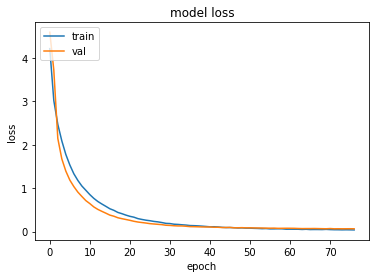

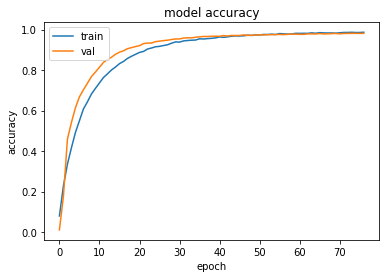

In [14]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [8]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [9]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  
cls='R'
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        #webcam
        img_array = img_array[:, 80:560, :]
        #dslr
#         img_array = cv2.resize(img_array[:, 224:800, :],(480,480))
        
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=0)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
#             if CATEGORIES[np.argmax(Y)]==cls:
            if np.max(Y)>0.8:
                cv2.imwrite(load_path+'/99.79_misc_rajesh/mp_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',image)
                cv2.imwrite(load_path+'/99.79_misc_rajesh/ori_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',img_array)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()